# Identify Fraud from Enron Email 

Enron scandal is one of the most famous scandals in the world. Because of the fraud, Enron went bankrupt in 2002. I heard and learnt a lot about it since day one in business school. During that time, all I learnt was about how did they cheat on their financial statement, but why Arthur Andersen, the auditor, did not find out. 

I was very excited when I knew there are tens of thousands of emails and detailed financial data for top executives, which I have never heard or thought about before. By playing around with these datasets, I can become a detective, my dreamy job when I was a kid after watching a lot Case Closed, to identify person of interest. 

In this project, I will apply what I my machine learning knowledge in this project to build up algorithms to find out who were involved in the scandle, meaning they were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

The main code will be stored in poi_id.py file.

## Dataset/Questions

The dataset I am going to use includes the financial and email information of people related to the scandle. The information will be read to a dictionary. The dictionary key is the person's name, and the value is another dictionary, which contains the names of all the features and their values for that person. The features in the data fall into three major types, namely financial features, email features and POI labels.

* financial features (all units are in US dollars)
    * 'salary'
    * 'deferral_payments'
    * 'total_payments'
    * 'loan_advances'
    * 'bonus'
    * 'restricted_stock_deferred'
    * 'deferred_income'
    * 'total_stock_value'
    * 'expenses'
    * 'exercised_stock_options'
    * 'other'
    * 'long_term_incentive'
    * 'restricted_stock'
    * 'director_fees'


* email features (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)
    * 'to_messages'
    * 'email_address'
    * 'from_poi_to_this_person'
    * 'from_messages'
    * 'from_this_person_to_poi'
    * 'shared_receipt_with_poi'


* POI label (boolean, represented as integer)
    * ‘poi' 
    
    
The question to answer and the goal of this project is to find out what features are related to the person of interest. When there are information without poi labels, the machine learning algorithm will be able to figure out whether this person is person of interest or not.

## Setup

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import pickle
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

%matplotlib inline

## Explore & Remove Outliers

The dataset we have may not be clean. There might be some outliers hidden inside that can affect our analysis. Therefore, it is essential to discover those outliers and remove them before conducting further analysis. The features I will start to explore are 'salary' and 'poi'.

In [13]:
%run poi_id.py

In [14]:
enron_dataset

{'ALLEN PHILLIP K': {'bonus': 4175000,
  'deferral_payments': 2869717,
  'deferred_income': -3081055,
  'director_fees': 'NaN',
  'email_address': 'phillip.allen@enron.com',
  'exercised_stock_options': 1729541,
  'expenses': 13868,
  'from_messages': 2195,
  'from_poi_to_this_person': 47,
  'from_this_person_to_poi': 65,
  'loan_advances': 'NaN',
  'long_term_incentive': 304805,
  'other': 152,
  'poi': False,
  'restricted_stock': 126027,
  'restricted_stock_deferred': -126027,
  'salary': 201955,
  'shared_receipt_with_poi': 1407,
  'to_messages': 2902,
  'total_payments': 4484442,
  'total_stock_value': 1729541},
 'BADUM JAMES P': {'bonus': 'NaN',
  'deferral_payments': 178980,
  'deferred_income': 'NaN',
  'director_fees': 'NaN',
  'email_address': 'NaN',
  'exercised_stock_options': 257817,
  'expenses': 3486,
  'from_messages': 'NaN',
  'from_poi_to_this_person': 'NaN',
  'from_this_person_to_poi': 'NaN',
  'loan_advances': 'NaN',
  'long_term_incentive': 'NaN',
  'other': 'NaN'

In [15]:
len(enron_dataset)

146

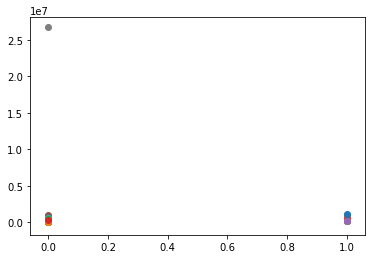

In [20]:
for point in data:
    poi = point[0]
    salary = point[1]
    plt.scatter(poi, salary)

In [22]:
for key, items in enron_dataset.items():
    print key

METTS MARK
BAXTER JOHN C
ELLIOTT STEVEN
CORDES WILLIAM R
HANNON KEVIN P
MORDAUNT KRISTINA M
MEYER ROCKFORD G
MCMAHON JEFFREY
HORTON STANLEY C
PIPER GREGORY F
HUMPHREY GENE E
UMANOFF ADAM S
BLACHMAN JEREMY M
SUNDE MARTIN
GIBBS DANA R
LOWRY CHARLES P
COLWELL WESLEY
MULLER MARK S
JACKSON CHARLENE R
WESTFAHL RICHARD K
WALTERS GARETH W
WALLS JR ROBERT H
KITCHEN LOUISE
CHAN RONNIE
BELFER ROBERT
SHANKMAN JEFFREY A
WODRASKA JOHN
BERGSIEKER RICHARD P
URQUHART JOHN A
BIBI PHILIPPE A
RIEKER PAULA H
WHALEY DAVID A
BECK SALLY W
HAUG DAVID L
ECHOLS JOHN B
MENDELSOHN JOHN
HICKERSON GARY J
CLINE KENNETH W
LEWIS RICHARD
HAYES ROBERT E
MCCARTY DANNY J
KOPPER MICHAEL J
LEFF DANIEL P
LAVORATO JOHN J
BERBERIAN DAVID
DETMERING TIMOTHY J
WAKEHAM JOHN
POWERS WILLIAM
GOLD JOSEPH
BANNANTINE JAMES M
DUNCAN JOHN H
SHAPIRO RICHARD S
SHERRIFF JOHN R
SHELBY REX
LEMAISTRE CHARLES
DEFFNER JOSEPH M
KISHKILL JOSEPH G
WHALLEY LAWRENCE G
MCCONNELL MICHAEL S
PIRO JIM
DELAINEY DAVID W
SULLIVAN-SHAKLOVITZ COLLEEN
WROBEL BRUC